# Importing all neccessary libraries 


In [2]:
import pandas as pd
import numpy as n
import seaborn as sns

#### The dataset used is pulled from UCI Machine Learning Repo "Facebook Live Sellers in Thailand Data Set" 

Read csv files and store in dataframe

In [3]:
all_data_raw = pd.read_csv('Live.csv')

In [4]:
all_data = pd.DataFrame(all_data_raw)

Clean the data ! unwanted data or repeated columns or NaN or null values must all be removed

In [6]:
all_data_new = all_data.drop(['Column1','Column2','Column3','Column4'], axis=1)

In [7]:
all_data_new.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Converting the date/time column from object to datetime to extract time and dates easily

In [8]:
all_data_new['status_published'] = pd.to_datetime(all_data_new['status_published'])

In [9]:
all_data_new['Time'] = all_data_new['status_published'].dt.time
brand_data = all_data_new
brand_data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Time
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,06:00:00
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22:45:00
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,06:17:00
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,02:29:00
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,03:22:00


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

##### Plotting the data to better understand the relation between the data

### Univariate Analysis 

Plotting countplot for status_type

<AxesSubplot:xlabel='status_type', ylabel='count'>

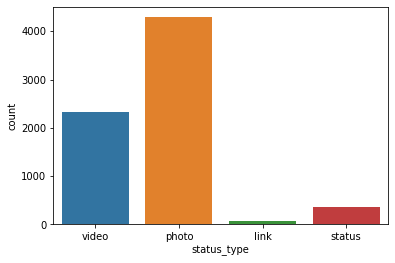

In [13]:
sns.countplot(x='status_type',data=brand_data)

The above plot shows that highest number of posts are photos and videos 

Plotting histogram for time in hours to check out max_usage

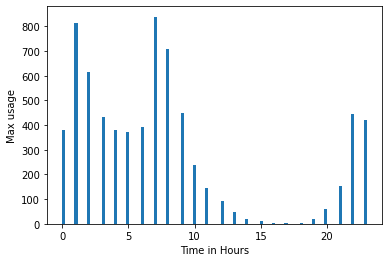

In [75]:
y= brand_data['status_published'].dt.hour
plt.hist(y,bins=100)
plt.xlabel('Time in Hours')
plt.ylabel('Max usage')
plt.show()

Total reactions made by people in 24 hours. We can see it is highest around early morning and and fades down in the afternoon and it reaches peak again in the midnight. We can roughly say that most of them used around Midnight and Early morning.

Plotting Distplot for time in days for max_usage

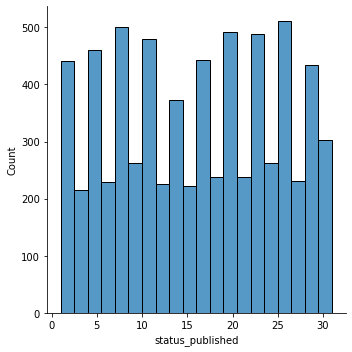

In [76]:
y= brand_data['status_published'].dt.day
sns.displot(y)
plt.show()

The above histogram shows the total usage and reactions made in a Month. The highest peak is during the 2nd week and on the 4th week of the month 

Plotting histogram for data throughout the year to see in which month the highest activity is seen.

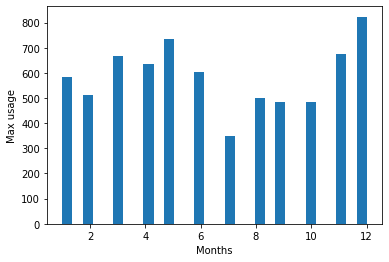

In [78]:
v = brand_data['status_published'].dt.month
plt.hist(v,bins=30)
plt.xlabel('Months')
plt.ylabel('Max usage')
plt.show()


The above histogram shows the total usage and reactions made in a whole Year. As we can see the highest is during the holidays season at the end of the year(Nov-Dec) and around summer (May-June)

Plotting distplot to check out number of reactions 

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


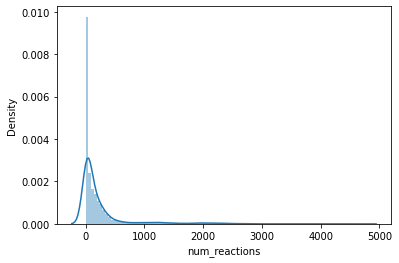

In [96]:
x = brand_data['num_reactions']
sns.distplot(x,bins=100)
plt.show()

### Bivariate Analysis

###### Plotting line plot for columns status_published and  num_comments

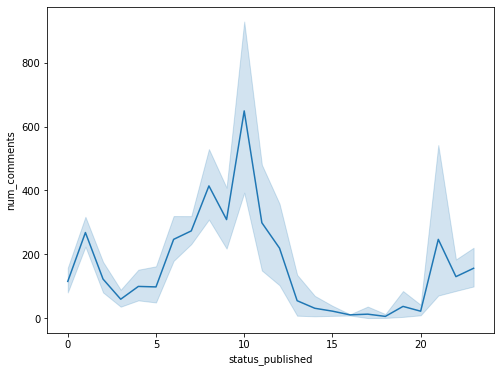

In [94]:
x= brand_data['status_published'].dt.hour
y= brand_data['num_comments']
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=brand_data, x=x, y=y)
plt.show()

Seeing how time and number of comments change through out the day and as its seen in the graph that around 8 AM to 10 AM is when the highest number of comments were made

###### Plotting scatter plot for status_published and num_reactions

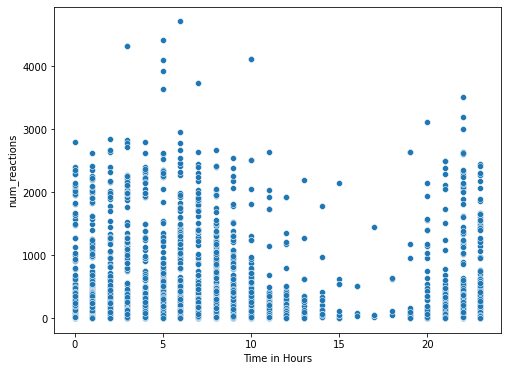

In [99]:
x= brand_data['status_published'].dt.hour
y= brand_data['num_reactions']
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('Time in Hours')
sns.scatterplot(data=brand_data, x=x, y=y)
plt.show()

We can see from the plot that the number of reactions is high during early morning hours(6AM to 8AM) and dies down later during hours

###### Plotting bar plot for num_shares and time in hours

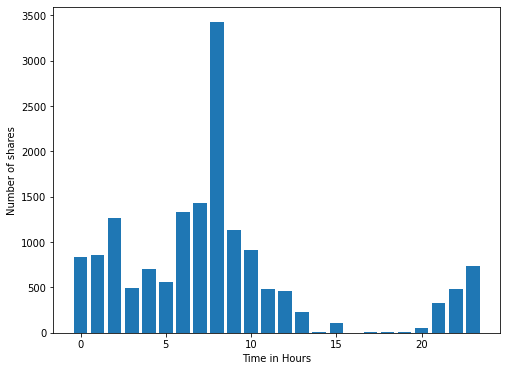

In [101]:
x= brand_data['status_published'].dt.hour
y= brand_data['num_shares']
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(x,y)
plt.xlabel('Time in Hours')
plt.ylabel("Number of shares")
plt.show()

We can see that the highest number of shares happen at 8AM in the morning and drops signficantly later

###### Plotting correlation of the dataframe for a better understanding of the data

In [47]:
corr_data = brand_data.corr()

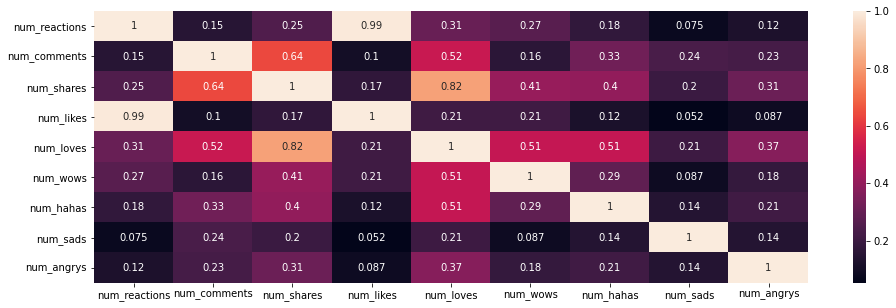

In [20]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_data,annot=True,xticklabels='auto', yticklabels='auto')

Checking further between num_reactions & num_likes

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


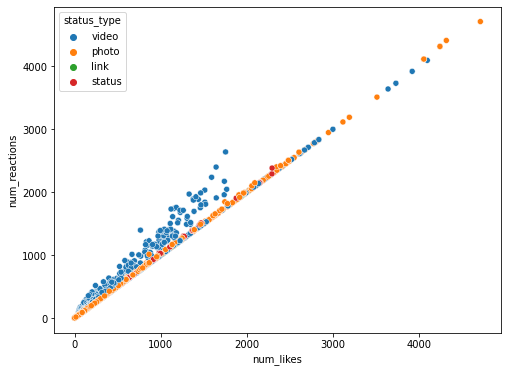

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
x= brand_data['status_type']
y=brand_data['num_likes']
w = brand_data['num_reactions']
sns.scatterplot(y,w,hue=x)
plt.show()

Plot shows that the num of reactions is proportional to num of likes for all the photos. Not much of a difference between the two columns except there's slightly more reactions to videos than for photos

Checking for num_shares and num_loves

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


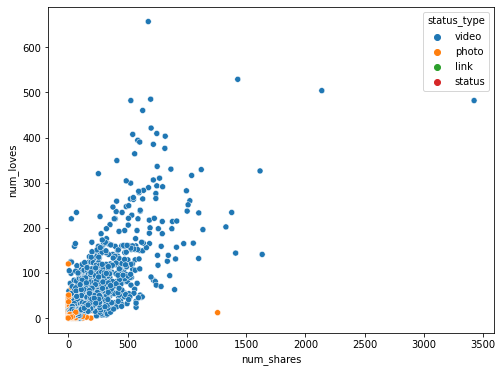

In [79]:
x= brand_data['status_type']
y= brand_data['num_shares']
w=brand_data['num_loves']
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(y,w,hue=x)
plt.show()

Checking for num_loves and num_comments

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


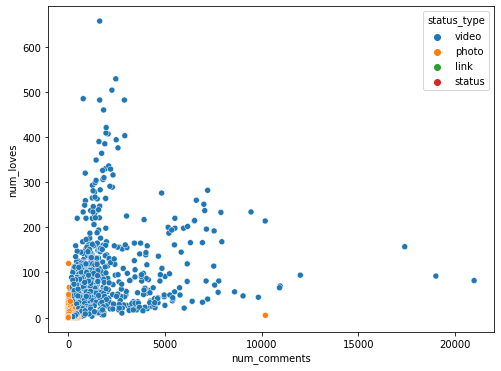

In [80]:
y= brand_data['num_comments']
x= brand_data['status_type']
w=brand_data['num_loves']
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(y,w,hue=x)
plt.show()


Checking for num_shares and num_comments

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


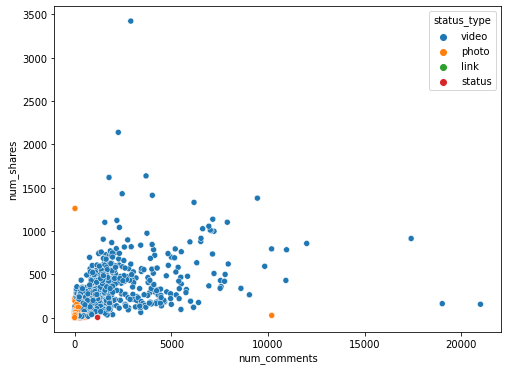

In [81]:
y= brand_data['num_comments']
x= brand_data['status_type']
w=brand_data['num_shares']
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(y,w,hue=x)
plt.show()

Plotting using pairplot to identify correlation

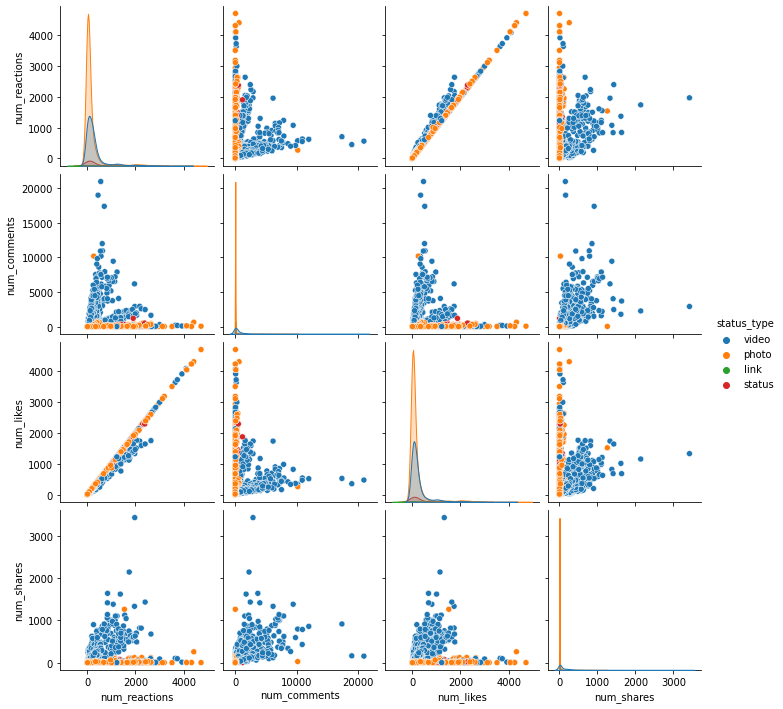

In [82]:
sns.pairplot(brand_data,x_vars=["num_reactions", "num_comments", "num_likes",'num_shares'],
            y_vars=["num_reactions", "num_comments", "num_likes",'num_shares'],
             hue='status_type')

We can see from the pariplot that photos have been reacted on  more rather than shared. we can also observe that the comments on videos are more than for photos.

The number of comments and shares for video almost proportional for smaller values and spreads for larger values

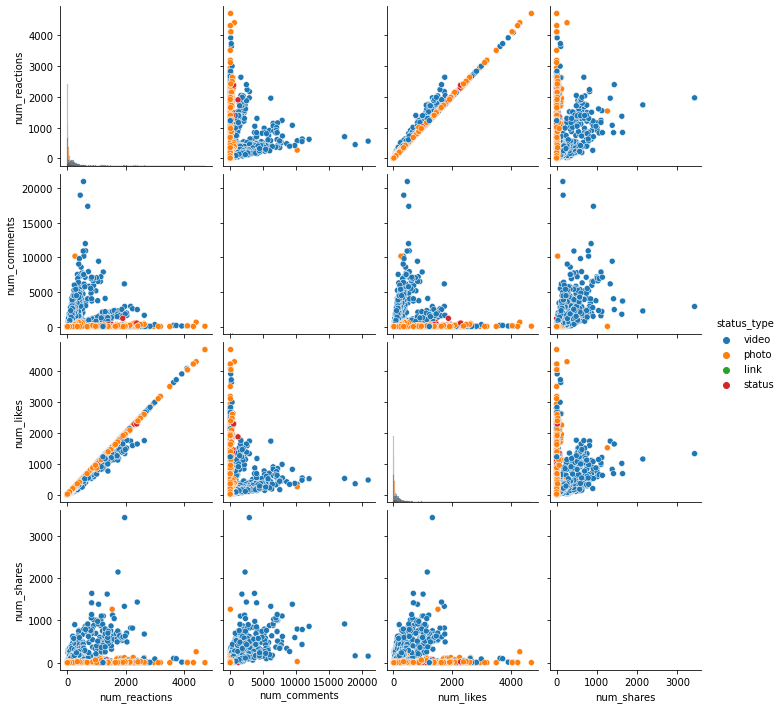

In [104]:
sns.pairplot(brand_data,x_vars=["num_reactions", "num_comments", "num_likes",'num_shares'],
            y_vars=["num_reactions", "num_comments", "num_likes",'num_shares'],
             hue='status_type',diag_kind="hist")